<H3> Problem 1 – IRIS/HISTOGRAMS </H3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import mixture

#libraries for market basket analysis
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [2]:
#read iris dataset in dataframe
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<h4> IRIS: Draw histograms of each of the four dimensions irrespective of class label </H4>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x129656550>,
      dtype=object)

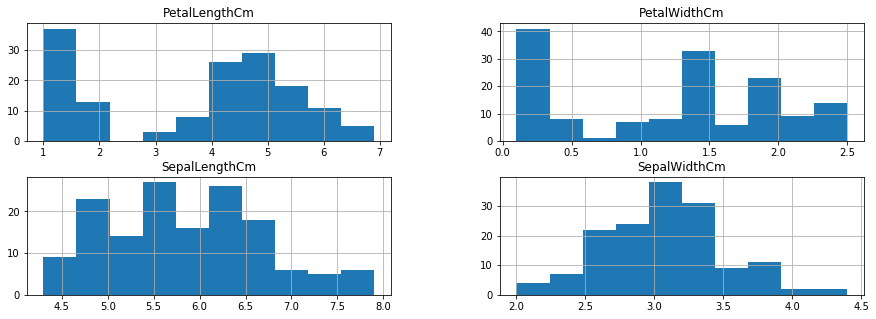

In [3]:
#plot all four columns
cols = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

fig, ax = plt.subplots(2, 2, figsize=(15,5))
iris.hist(column=cols, ax=ax)

<h4> IRIS: Draw histograms each dimension for each class separately </h4>

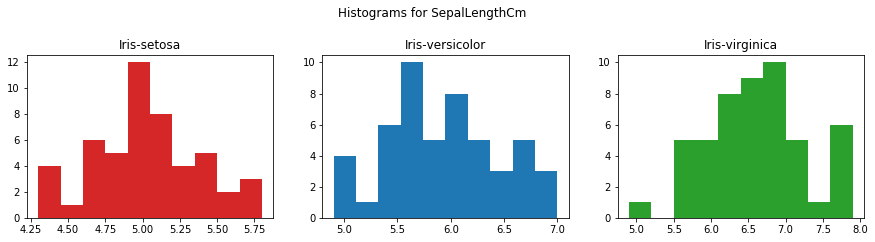

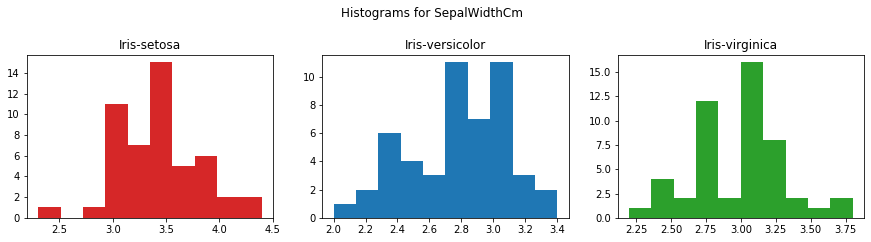

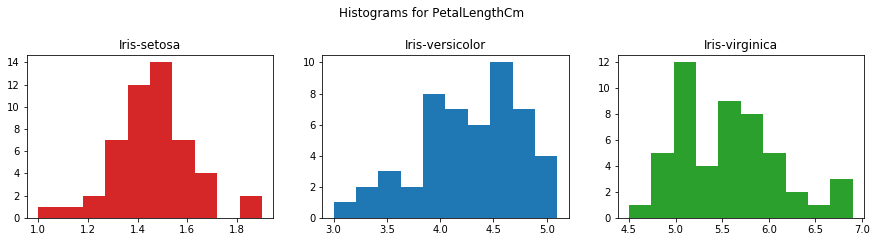

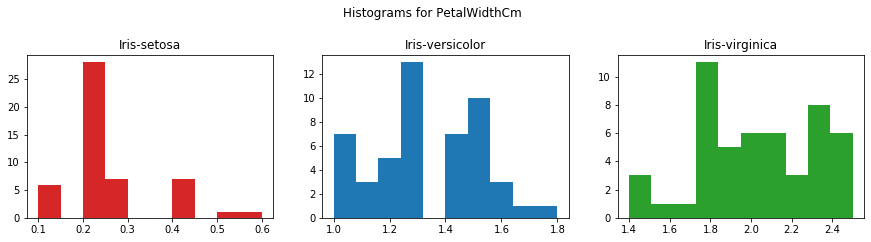

In [4]:
colors = ['tab:red', 'tab:blue', 'tab:green']

for col in cols :
    fig, axes = plt.subplots(1, 3, figsize=(15,3))
    sub_title = plt.suptitle('Histograms for ' + col)   #subplot title
    sub_title.set_y(1.1)
    #fig.subplots_adjust(top=1)
    for i, (ax, type) in enumerate(zip(axes.flatten(), iris.Species.unique())):
        x = iris.loc[iris.Species==type, col]
        ax.hist(x, label=str(type), color=colors[i])   #color encode each class
        ax.set_title(type)

<h4> Comparing the above which dimension will discriminate the three classes best?  </h4>

<H3>Problem 2 - BOSON/HISTOGRAMS </H3>

In [5]:
#read boson training dataset in dataframe
boson = pd.read_csv('boson.csv')

#check dataset rows and column counts
print(boson.shape)

#Check type of each column type
print(boson.dtypes)

#Get all column names in a array
boson_cols = boson.columns
boson_features = [col for col in boson_cols if col not in {'EventId','Weight','Label'}]
print(boson_features)
boson.head()

(250000, 33)
EventId                          int64
DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt             float64
PRI_jet_lead

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


<h4>BOSON: Draw histograms of each of the 30 dimensions irrespective of class</h4>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x129f229b0>,
      dtype=object)

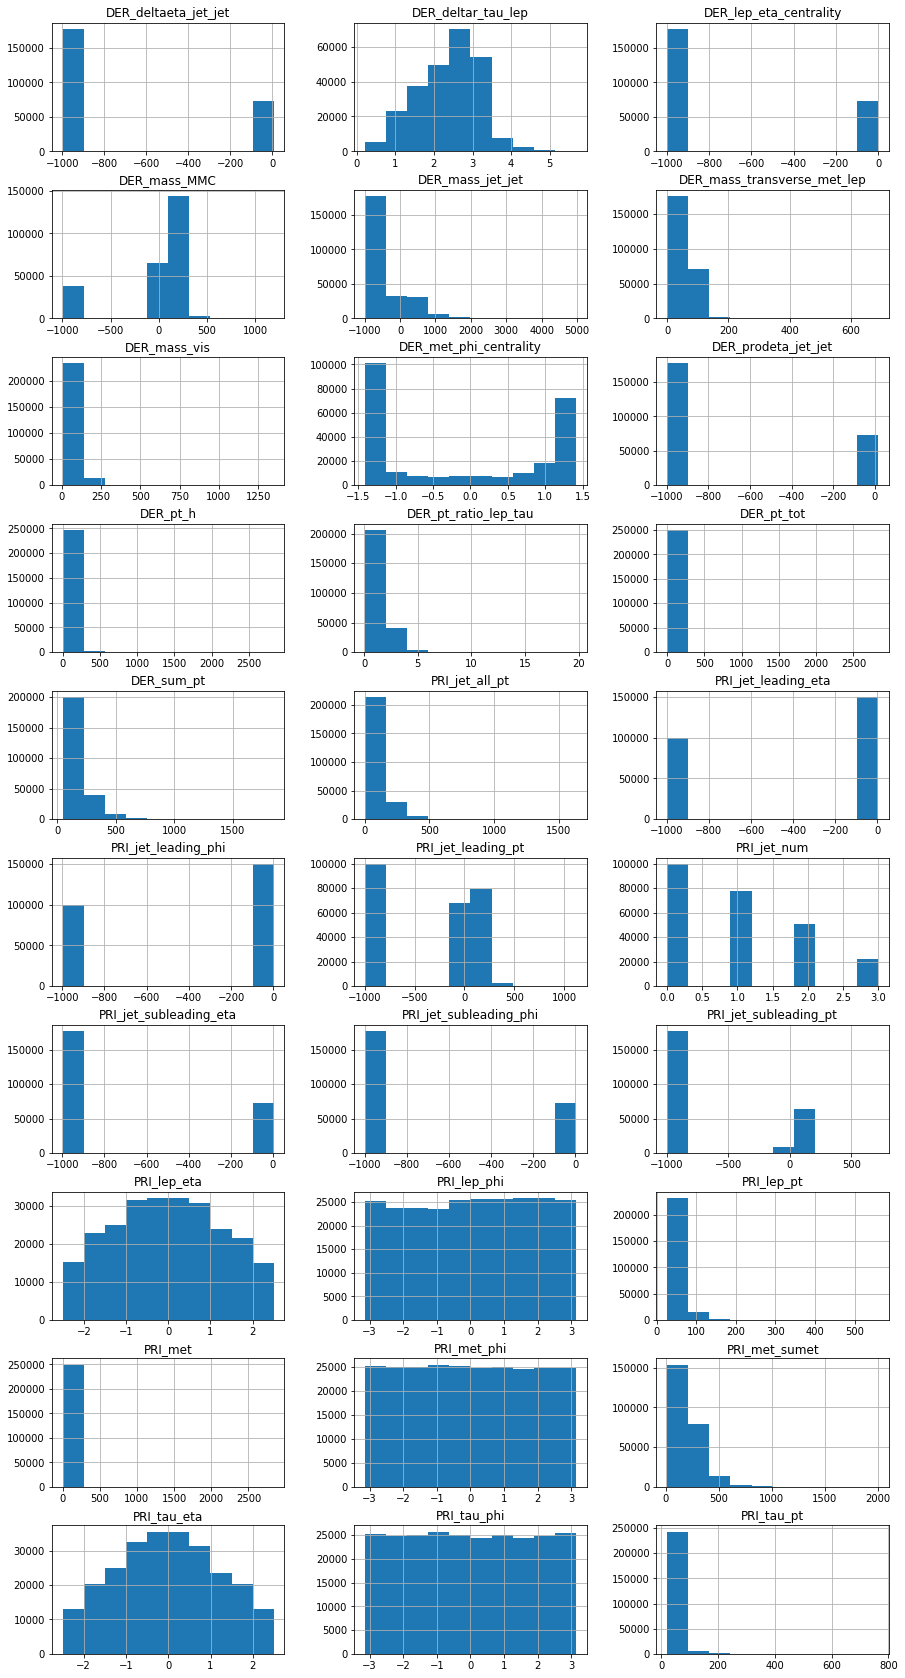

In [6]:
#plot all 30 columns
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
boson.hist(column=boson_features, figsize=(15,30), layout=(10,3))

<h4> BOSON: Draw histograms of each of the 30 dimensions for each of the two classes </h4>

/Users/anmol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


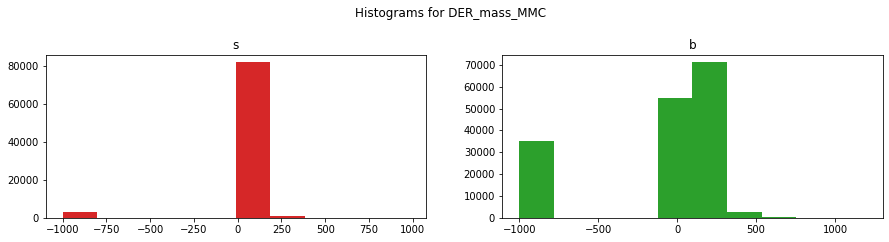

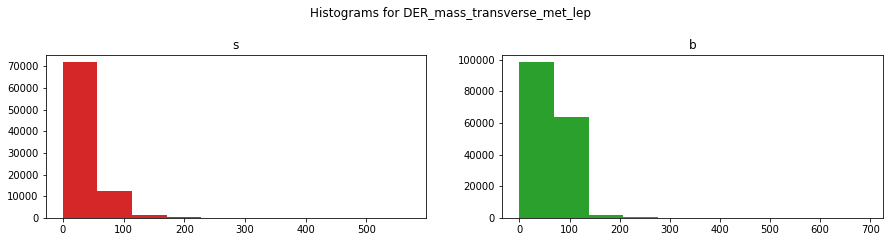

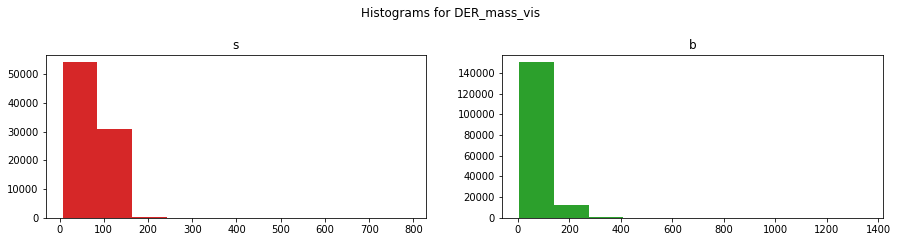

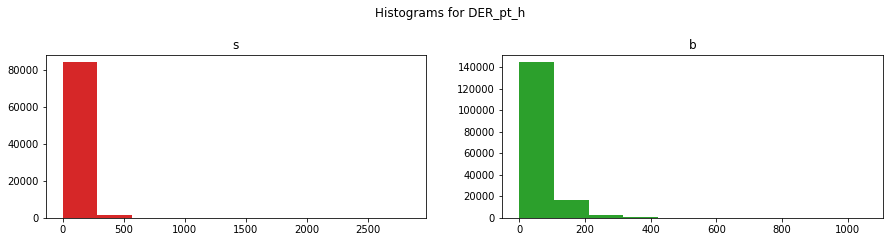

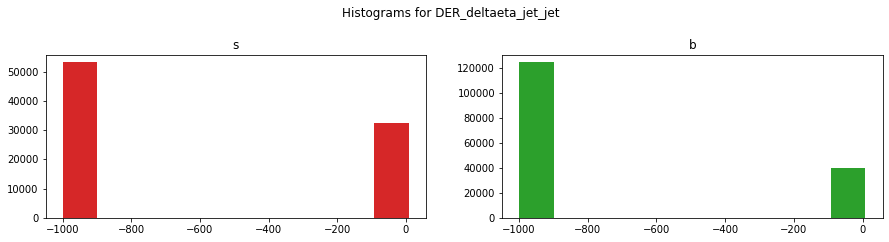

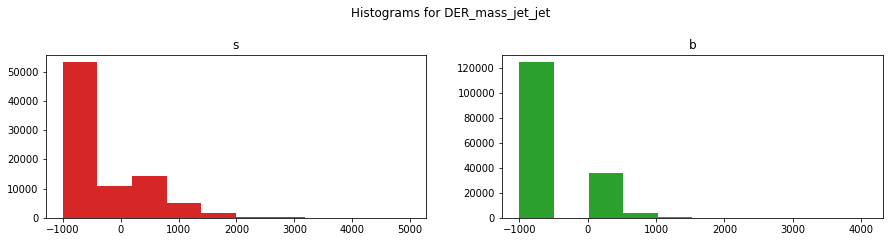

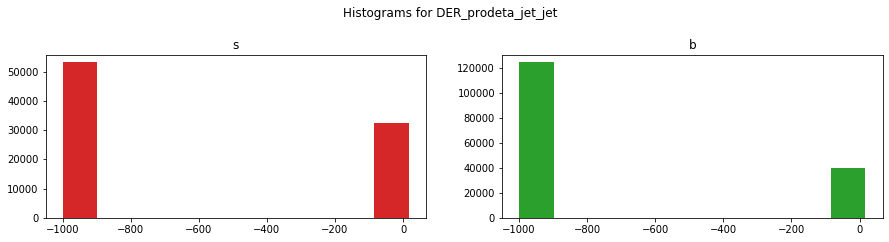

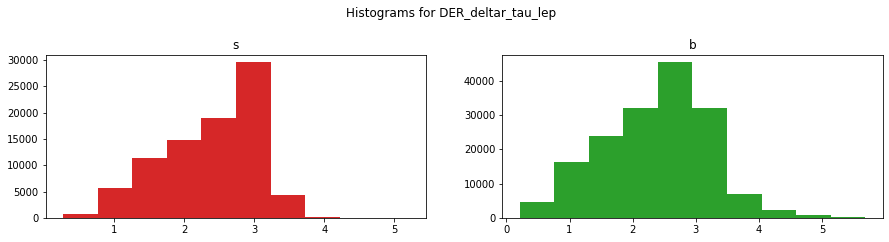

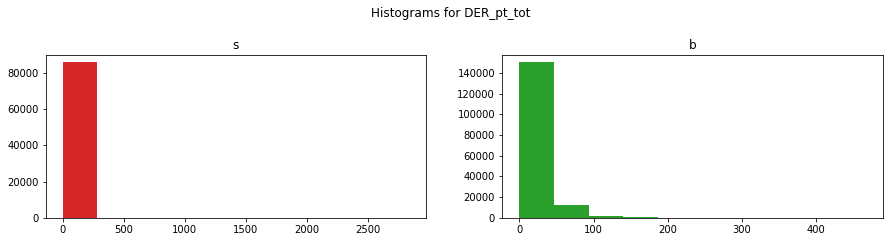

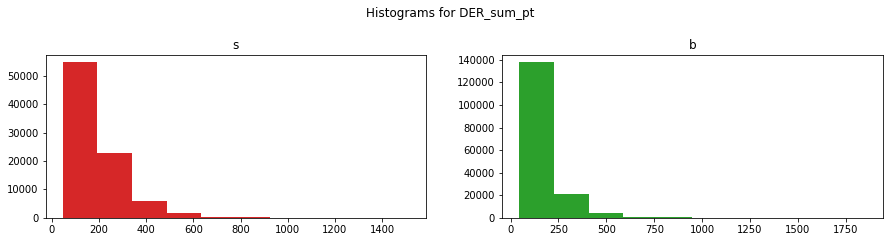

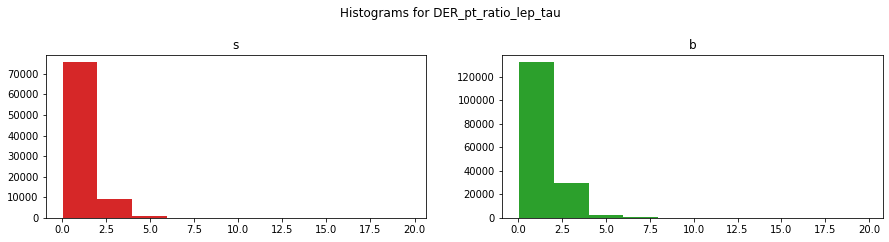

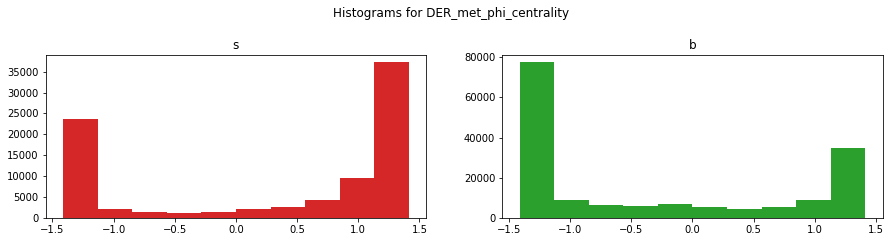

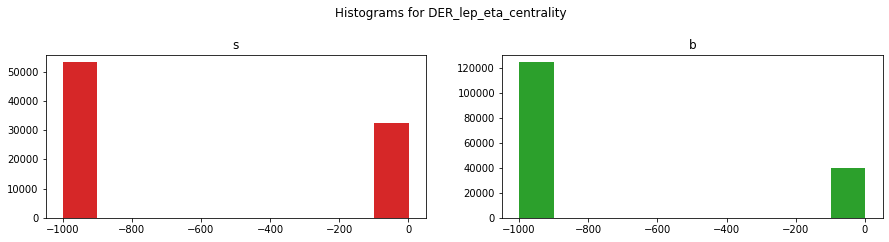

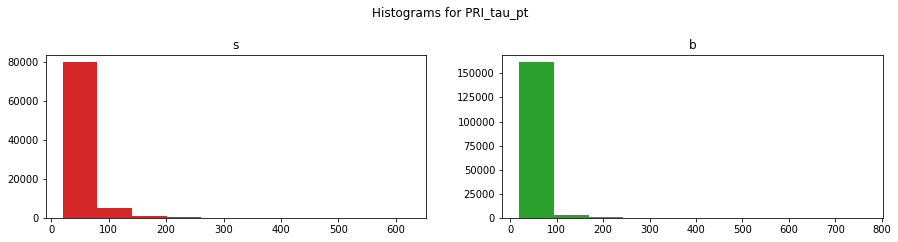

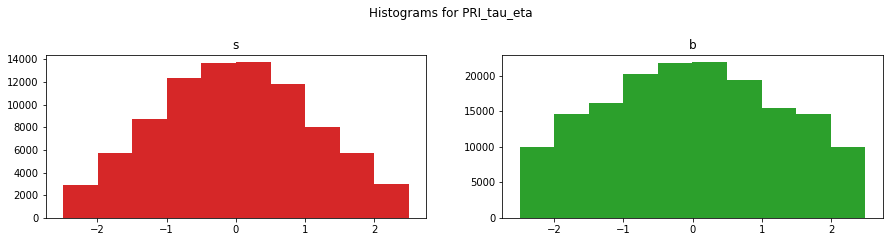

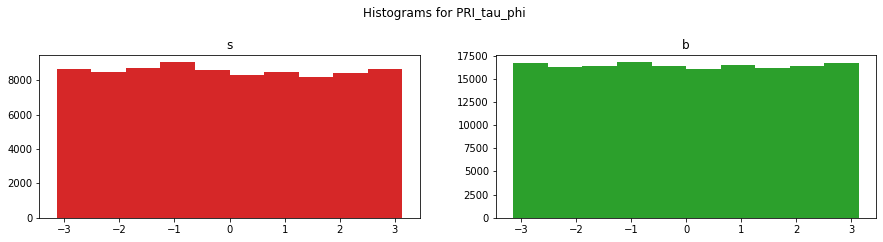

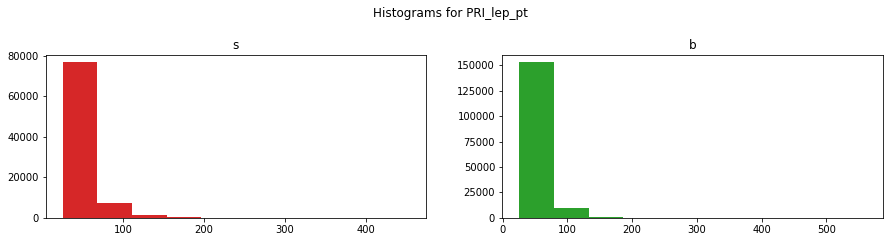

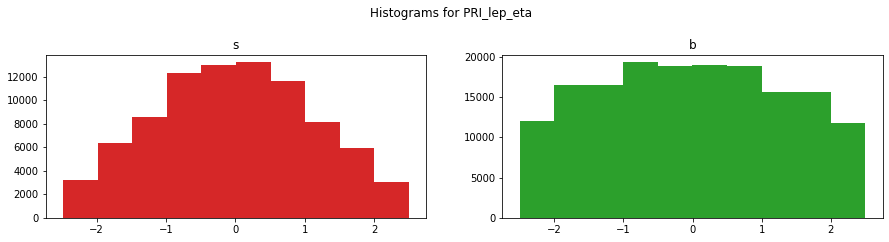

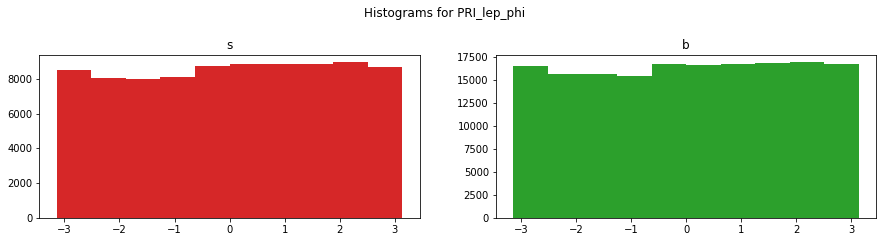

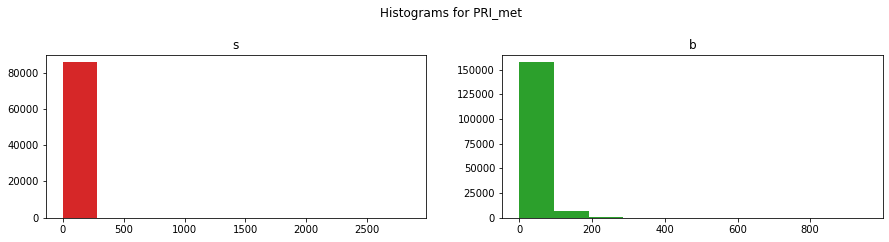

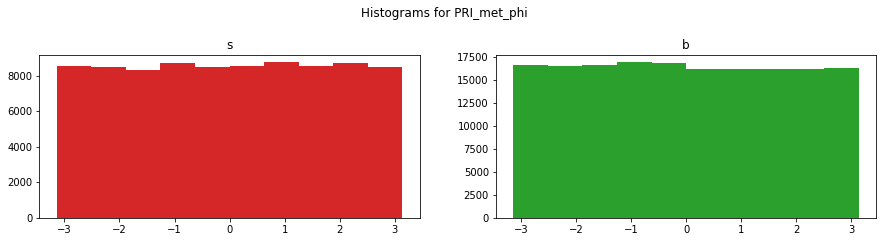

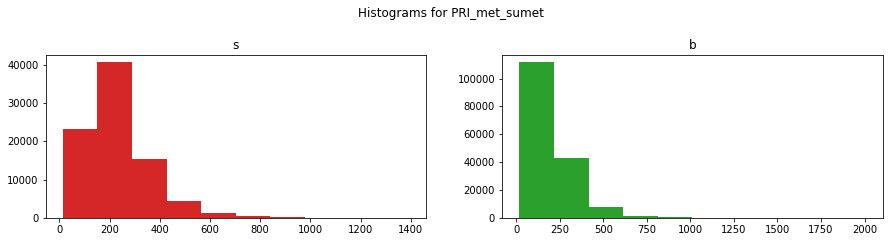

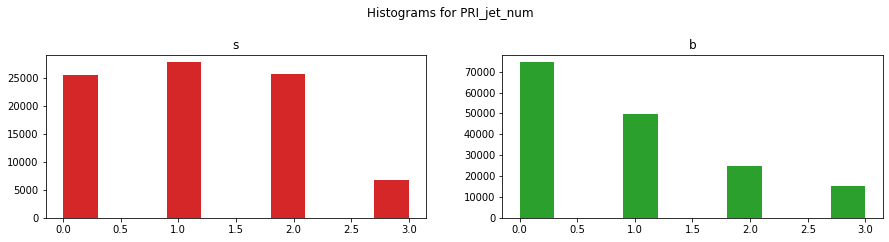

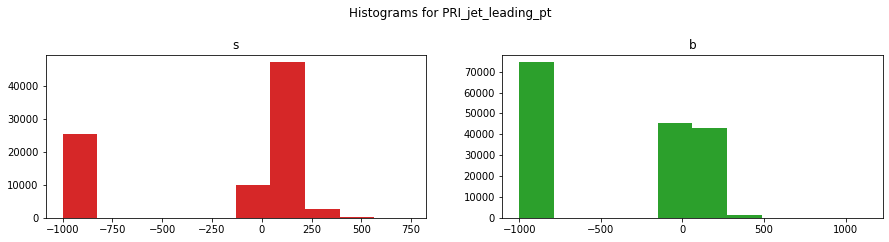

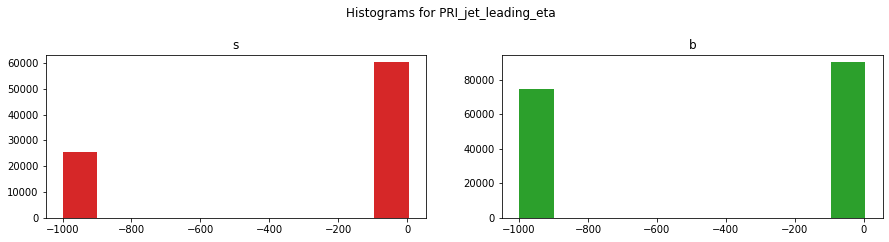

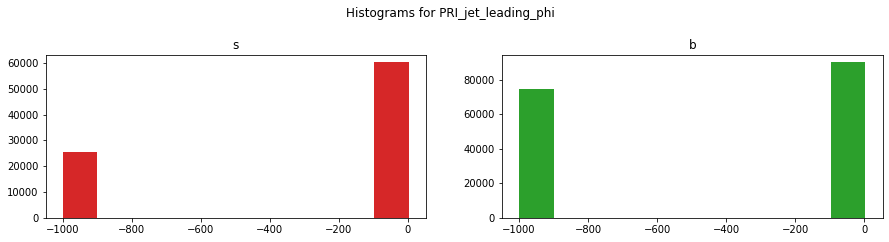

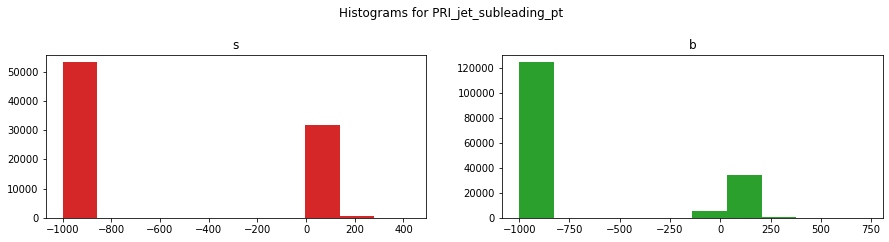

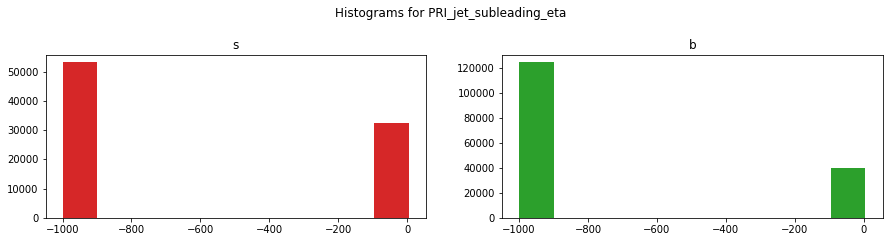

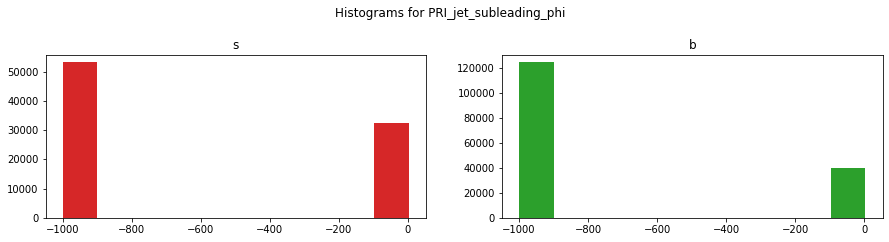

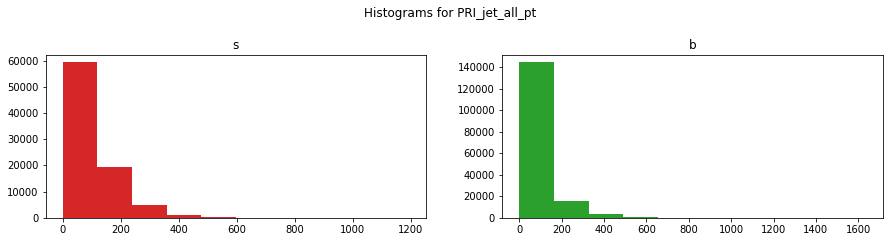

In [7]:
colors = ['tab:red', 'tab:green']

for col in boson_features :
    fig, axes = plt.subplots(1, 2, figsize=(15,3))
    sub_title = plt.suptitle('Histograms for ' + col)   #subplot title
    sub_title.set_y(1.1)
    #fig.subplots_adjust(top=1)
    for i, (ax, label) in enumerate(zip(axes.flatten(), boson.Label.unique())):
        x = boson.loc[boson.Label==label, col]
        ax.hist(x, label=str(label), color=colors[i])   #color encode each class
        ax.set_title(label)

<h4>Comparing the above which dimension will discriminate the two classes best?</h4>

<h3>Problem 3 - IRIS/SCATTERPLOTS </h3>

<h4> Draw the scatterplots of the 4 choose 2 pairs of dimensions </h4>

#Ref : https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_iris_scatter.html

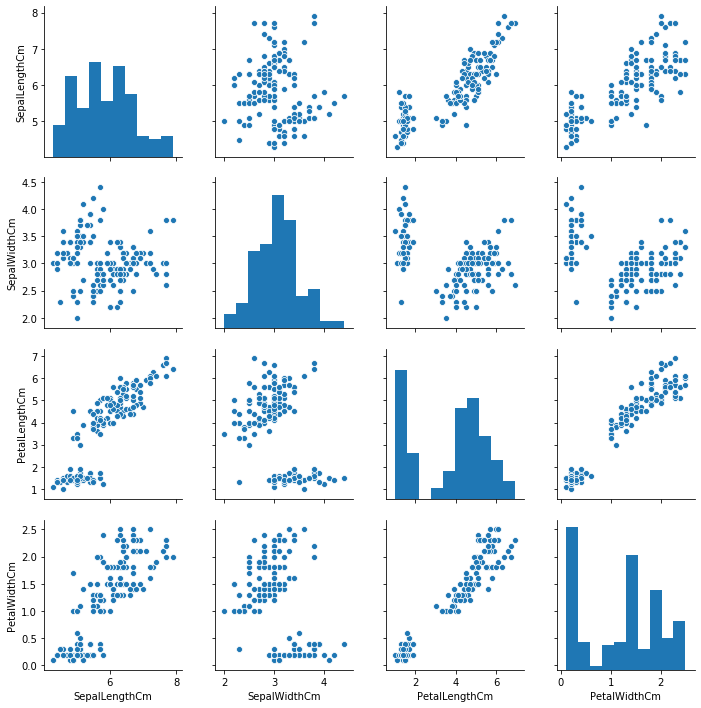

In [8]:
colors = ['tab:red', 'tab:blue', 'tab:green']
sns.pairplot(data=iris[cols], kind='scatter', palette=colors, diag_kind='hist')

<h4>Color code each data point by its class.</h4>

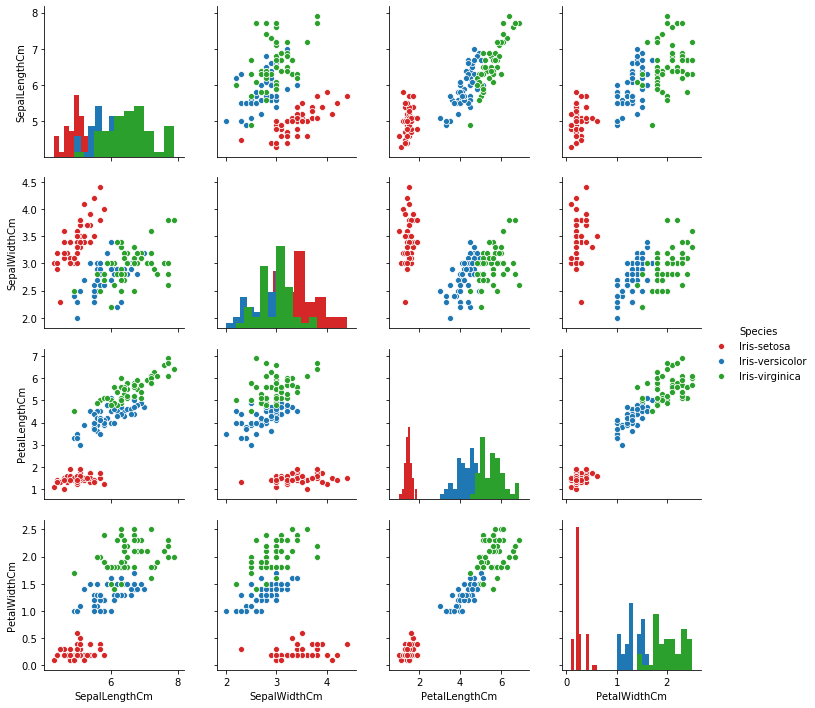

In [9]:
cols = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm', 'Species']
sns.pairplot(data=iris[cols], kind='scatter', palette=colors, diag_kind='hist', hue="Species")

<h4> Which two-dimensional scatter plot shows maximum separation among classes? </h4>

Scatter plots between - (PetalLengthCm, PetalWidthCm), (PetalWidthCm, SepalLengthCm) and (PetalWidthCm, SepalWidthCm) shows maximum separation

We can clearly identify 'Iris-Setosa' using these scatter plots and to some extent dicriminate between 'Iris-versicolor' and 'Iris-virginia'

<h3> Problem 4 – BOSON/SCATTERPLOTS </h3>

<h4> From Problem 2, can you tell which dimensions could use a log? </h4>

We can apply log to dimensions which are showing right skewness. Also, it should have positive x values. as np.log(negative) = NaN

Looking at plots above, columns on which we can apply log are -

In [10]:
selected_cols = ['DER_mass_transverse_met_lep',
                 'DER_mass_vis',                 
                 'DER_pt_h',
                 'DER_pt_ratio_lep_tau',
                 'DER_pt_tot',
                 'DER_sum_pt',
                 'PRI_lep_pt',
                 'PRI_met',
                 'PRI_met_sumet',
                 'PRI_tau_pt']

<h4> Now take two such dimensions and draw a scatterplot between them </h4>

[('DER_mass_transverse_met_lep', 'DER_mass_vis'), ('DER_mass_transverse_met_lep', 'DER_pt_h'), ('DER_mass_transverse_met_lep', 'DER_pt_ratio_lep_tau'), ('DER_mass_transverse_met_lep', 'DER_pt_tot'), ('DER_mass_transverse_met_lep', 'DER_sum_pt'), ('DER_mass_transverse_met_lep', 'PRI_lep_pt'), ('DER_mass_transverse_met_lep', 'PRI_met'), ('DER_mass_transverse_met_lep', 'PRI_met_sumet'), ('DER_mass_transverse_met_lep', 'PRI_tau_pt'), ('DER_mass_vis', 'DER_pt_h'), ('DER_mass_vis', 'DER_pt_ratio_lep_tau'), ('DER_mass_vis', 'DER_pt_tot'), ('DER_mass_vis', 'DER_sum_pt'), ('DER_mass_vis', 'PRI_lep_pt'), ('DER_mass_vis', 'PRI_met'), ('DER_mass_vis', 'PRI_met_sumet'), ('DER_mass_vis', 'PRI_tau_pt'), ('DER_pt_h', 'DER_pt_ratio_lep_tau'), ('DER_pt_h', 'DER_pt_tot'), ('DER_pt_h', 'DER_sum_pt'), ('DER_pt_h', 'PRI_lep_pt'), ('DER_pt_h', 'PRI_met'), ('DER_pt_h', 'PRI_met_sumet'), ('DER_pt_h', 'PRI_tau_pt'), ('DER_pt_ratio_lep_tau', 'DER_pt_tot'), ('DER_pt_ratio_lep_tau', 'DER_sum_pt'), ('DER_pt_ratio_l

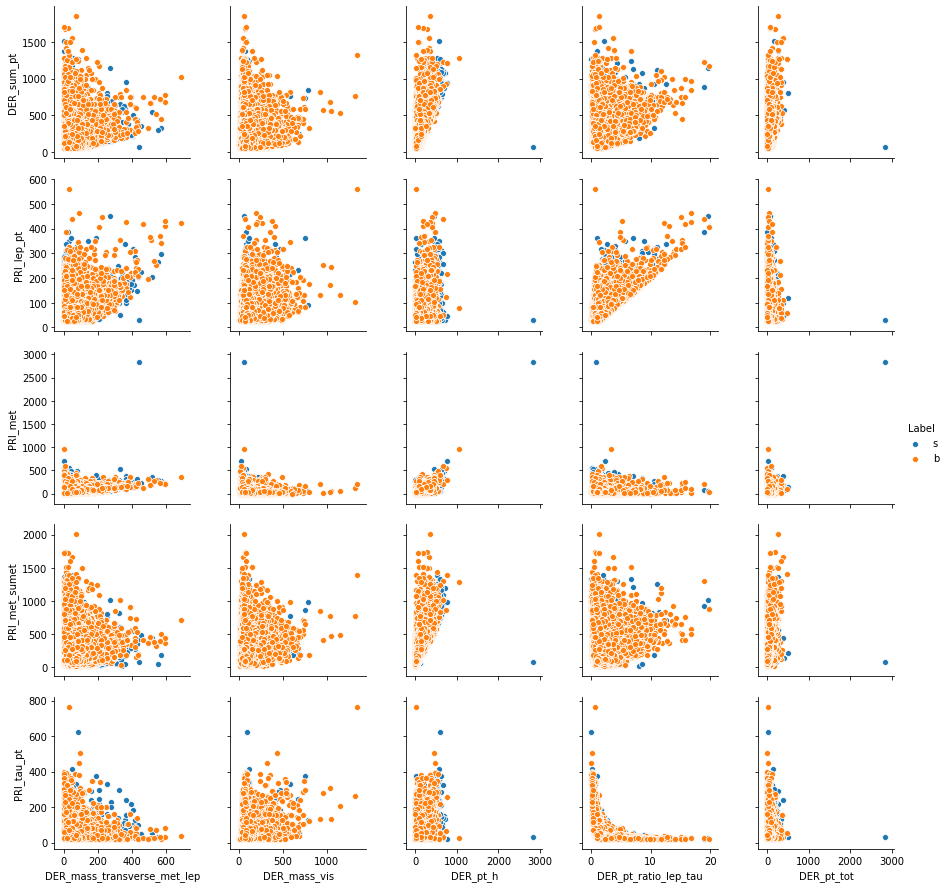

In [11]:
#get pairwise combinations from all for features
combinations = list(itertools.combinations(selected_cols, 2))
print(combinations)

#Draw scatterplot between pairwise combinations
sns.pairplot(x_vars=['DER_mass_transverse_met_lep','DER_mass_vis','DER_pt_h','DER_pt_ratio_lep_tau','DER_pt_tot'],
             y_vars=['DER_sum_pt','PRI_lep_pt','PRI_met','PRI_met_sumet','PRI_tau_pt'],
             data=boson, hue="Label")

<h4>One WITHOUT taking logs vs. one WITH taking logs.</h4>

/Users/anmol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


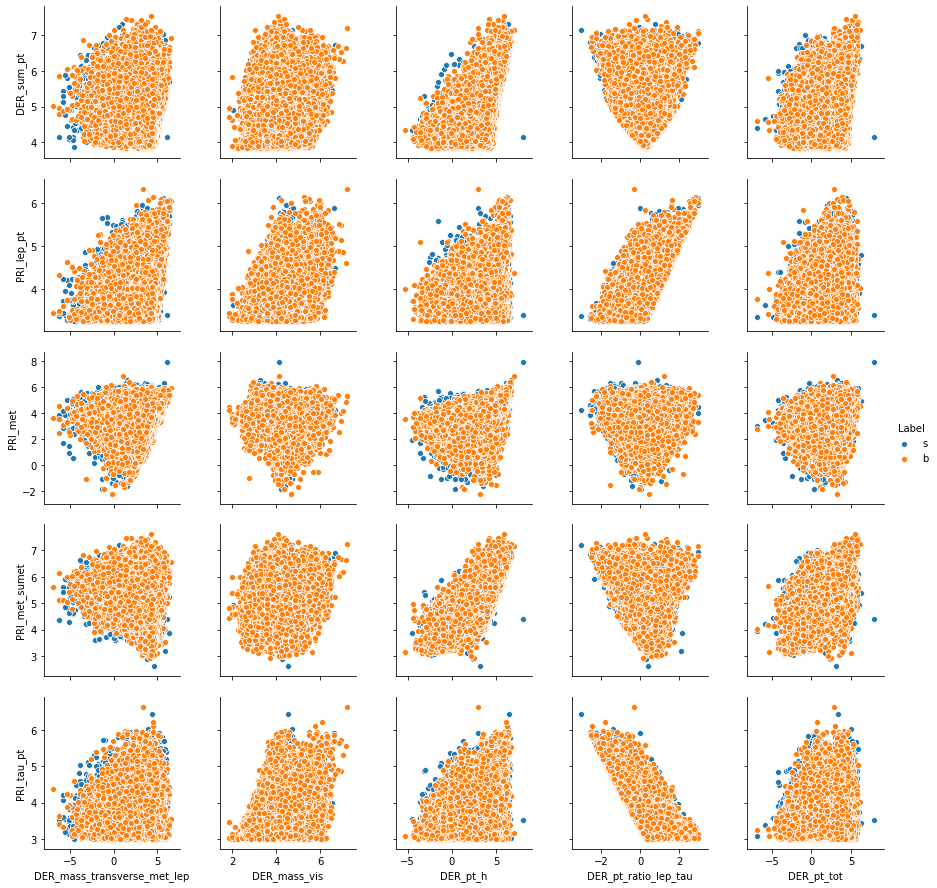

In [12]:
#draw scatter plots after taking log of selected columns
boson_log = np.log(boson[selected_cols])
boson_log = pd.concat([boson.loc[:,['Label']],boson_log], axis = 1)

#Draw scatterplot between pairwise combinations
sns.pairplot(x_vars=['DER_mass_transverse_met_lep','DER_mass_vis','DER_pt_h','DER_pt_ratio_lep_tau','DER_pt_tot'],
             y_vars=['DER_sum_pt','PRI_lep_pt','PRI_met','PRI_met_sumet','PRI_tau_pt'],
             data=boson_log, hue="Label")

<h4>Sample the data if it is too much to see. Notice how taking the logs makes visualization better?</h4>

log makes scatter plots more dense and easy to interpret as data points are all over the plot area. For example a plot between (PRI_met, DER_pet_h) which was not interpretable earlier shows the area where labels are 's' clearly after taking log

<h3> Problem 5 – DIGITS/PCA </h3>
<h4> We will do 2-D PCA projection of EACH class separately. </h4>

#Ref : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [13]:
#read didigts dataset from csv
digits = pd.read_csv('digit.csv')

#get all labels list
digit_labels = digits.label.unique()
print(digit_labels)

digits.head()

[1 0 4 7 3 5 8 9 2 6]


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h4> Draw 10 scatter plots, one for each class. In each scatter plot, first do a 2-D PCA and plot them on a scatter plot </h4>

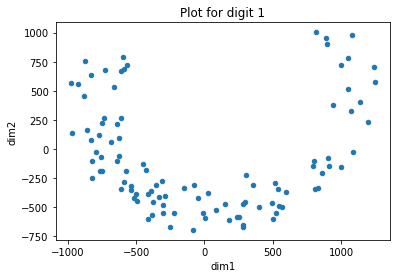

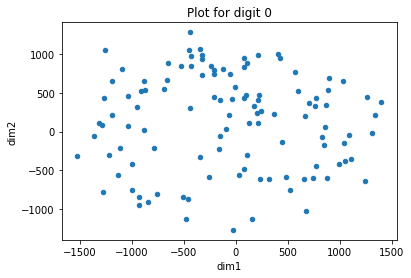

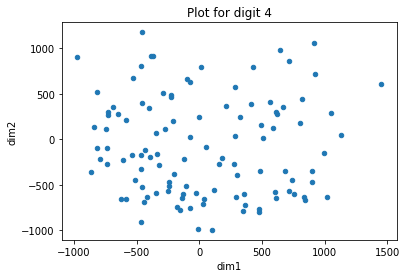

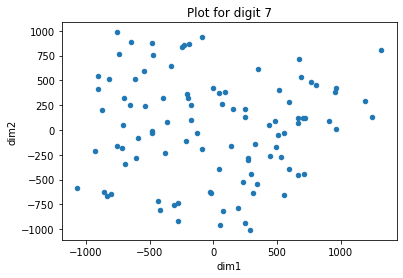

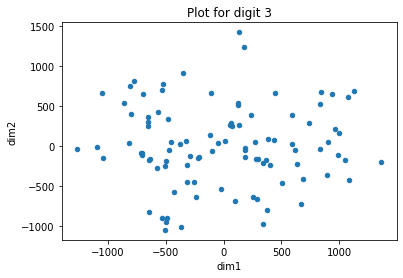

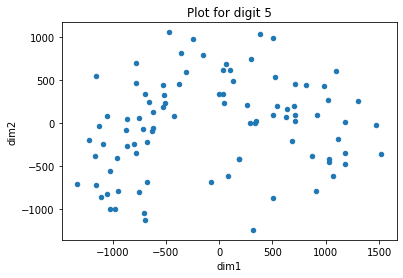

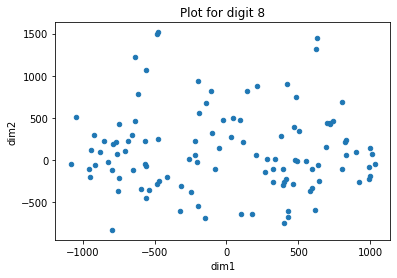

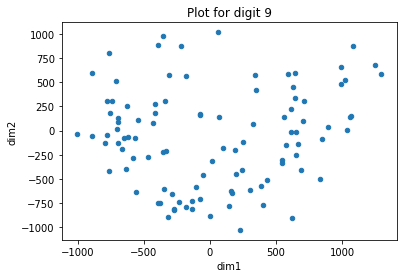

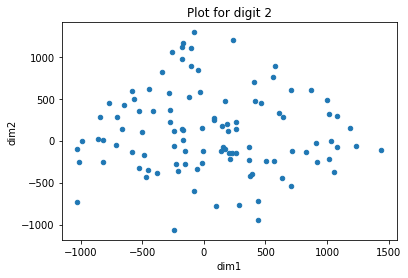

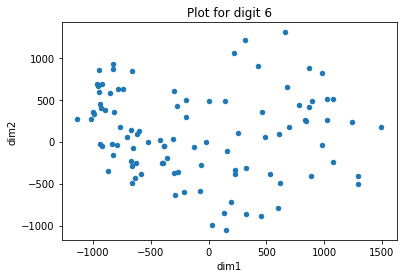

In [14]:
#for each label, filter the dataframe 
#Run PCA on feature columns, plot 2D scatter plots 
for label in digit_labels :
    digit_df = digits[digits['label'] == label]
    
    #get column names of all features
    digit_feature_cols = list(digits.columns)
    digit_feature_cols.remove('label')
    
    #Run PCA on all dimensions and transform to 2 dimension
    X = digit_df.loc[:, digit_feature_cols]
    y = digit_df.loc[:, 'label']
    pca = PCA(n_components=2)
    pca_array = pca.fit_transform(X)
    
    digits_pca_df = pd.DataFrame(data = pca_array,
                         columns = ['dim1', 'dim2'])
    digits_pca_df = pd.concat([digits_pca_df, y], axis = 1)
     
    digits_pca_df.sample(200).plot.scatter('dim1', 'dim2', title='Plot for digit ' + str(label))

<h4> Comment on any interesting patterns – e.g. do you see a “higher spread” in digits that are written in multiple ways? </h4>

<h3> Problem 6 – DIGITS/PCA/CLUSTERING/INITIALIZATION </h3>

Convert raw data into a 30-dimensional data
- Take all the DIGITS data
- Do a PCA on the entire data
- Project the data in the top-30 PCA dimensions
- We will now do clustering in this data
- Let’s call it DIGITS_PCA_30 dataset


In [15]:
#get column names of all features
digit_feature_cols = list(digits.columns)
digit_feature_cols.remove('label')

#Run PCA and reduce it to 30 dimensions
X = digits.loc[:, digit_feature_cols]
y = digits.loc[:, 'label']
#print(X.shape)
pca = PCA(n_components=30, whiten=True)
digits_pca_30_array = pca.fit_transform(X)

In [16]:
#join X features and y labels to a dataframe. Later on array is passed on to PCA
digits_pca_30 = pd.DataFrame(data = digits_pca_30_array,
                         columns = np.arange(1,31))
digits_pca_30 = pd.concat([y,digits_pca_30], axis = 1)
digits_pca_30.head()

,label,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1,-1.143438,-1.410277,0.398957,0.280623,-0.197778,1.273271,-2.037403,0.271493,1.130744,...,0.232195,1.191335,0.311559,-0.836853,0.082082,0.235200,-2.006027,1.282498,0.384116,0.595171
1,0,2.940624,-0.727112,-1.092298,0.780422,-1.079069,1.920862,1.949180,-0.560382,-0.024396,...,-1.109562,-1.458947,0.038636,-0.128142,-0.200823,-1.569957,-0.455688,0.080007,-0.504403,-0.580499
2,1,-1.532822,-0.592427,0.146179,0.182094,-1.155508,-0.841649,1.305064,-0.969012,-0.633569,...,-0.546263,0.690763,0.833234,0.294662,-0.647567,-0.531721,-1.377582,0.657200,-0.066328,0.852585
3,4,-0.286476,0.605368,-0.139628,1.767589,-1.038738,0.409430,-0.906509,0.877090,-0.148802,...,-1.211857,-0.483214,1.611144,0.706896,-0.393263,1.137773,-1.107226,0.513844,1.332340,1.325954
4,0,3.324753,-0.905792,-1.194185,0.438706,-1.589743,2.575522,1.682776,-0.812060,0.405244,...,-0.079739,-0.699497,-0.774350,-0.323278,1.001311,0.040016,0.300932,-1.007338,-0.436991,0.091432


We want to see the effect of initialization on K-means clustering.
- We will build 10 clusters (K = 10) in the following experiments
- We will do 11 initializations: <br/>
o	Initialize the 10 cluster centers from class 0<br/>
o	Initialize the 10 cluster centers from class 1<br/>
o	...<br/>
o	Initialize the 10 cluster centers from class 9<br/>
o	Initialize the 10 cluster centers – one from each class<br/>


- For each of these initializations <br/>
o	Do k-means clustering <br/>
o	Use stopping criteria: When no cluster changes happen <br/>
o	Measure the Number of iterations it took to converge in each case<br/>
o	Measure the Purity (See below) of the final clustering you got in each case<br/>
o	Tabulate the results in a table with 11 rows and 3 columns<br/>
- Column 1 – initialization method
- Column 2 – number of iterations to converge
- Column 3 – purity of final cluster



In [17]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.amax.html
def calculate_cluster_purity(actual_labels, assigned_clusters) :
    df_temp = pd.DataFrame(columns=['Actual Label','Assigned Cluster No'])
    df_temp['Actual Label'] = actual_labels
    df_temp['Assigned Cluster No'] = assigned_clusters
    
    #count total unique clusters identified by kmeans
    unique_clusters = list(np.unique(assigned_clusters))
    print(unique_clusters)
    
    sum_max_points = 0
    for cluster in unique_clusters :
        #filter out points associated with each cluster one by one
        df_cluster_temp = df_temp[df_temp['Assigned Cluster No'] == cluster]
        max_points_assigned = df_cluster_temp['Actual Label'].value_counts().values.argmax()
        max_points_count = df_cluster_temp['Actual Label'].value_counts().max()
        sum_max_points += max_points_count
        #print(max_points_assigned, max_points_count)
        
    #purity is counting the number of points belonging class which is most frequent in the cluster/ total number of points (42K here)
    return sum_max_points/len(assigned_clusters)   

In [18]:
#ref : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
results_df = pd.DataFrame(columns=['Initialization Method', 'No of Iterations', 'Purity of Cluster'])

#run 10 kmeans by initializing 10 cluster from each class from 0-9 
for label in y.unique() :
    df_subset = digits_pca_30[digits_pca_30['label'] == label] 
    df_subset = df_subset.drop(columns='label')
    
    #take 10 random rows for each digit, convert it to array for kmeans
    init_array = df_subset.sample(10).to_numpy()
    
    #using n_init=1, as we are passing the initial centroid points to consider
    kmeans = KMeans(init=init_array, n_clusters=10, n_init=1)
    
    #passing in data in array format
    kmeans_fit = kmeans.fit(digits_pca_30_array)
    init_method = "Centroid chosen from class " + str(label)
    n_iter = kmeans_fit.n_iter_
    cluster_purity = calculate_cluster_purity(y, kmeans_fit.labels_)
    results_df = results_df.append([{'Initialization Method' : init_method,
                       'No of Iterations' : n_iter,
                       'Purity of Cluster' : cluster_purity}])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [19]:
initial_centroid_df = pd.DataFrame()
for label in digit_labels :
    df_subset = digits_pca_30[digits_pca_30['label'] == label]
    df_subset = df_subset.drop(columns='label')
    initial_centroid_df = initial_centroid_df.append(df_subset.sample(1))
    
kmeans = KMeans(init=initial_centroid_df.to_numpy(), n_clusters=10, n_init=1)
#passing in data in array format
kmeans_fit = kmeans.fit(digits_pca_30_array)
init_method = "Centroid chosen randomly one from each class"
n_iter = kmeans_fit.n_iter_
cluster_purity = calculate_cluster_purity(y, kmeans_fit.labels_)
results_df = results_df.append([{'Initialization Method' : init_method,
                       'No of Iterations' : n_iter,
                       'Purity of Cluster' : cluster_purity}])
    
results_df.head(20)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


,Initialization Method,No of Iterations,Purity of Cluster
0,Centroid chosen from class 1,98,0.536190
0,Centroid chosen from class 0,70,0.574405
0,Centroid chosen from class 4,173,0.511833
0,Centroid chosen from class 7,69,0.516238
0,Centroid chosen from class 3,85,0.478429
0,Centroid chosen from class 5,90,0.496429
0,Centroid chosen from class 8,85,0.520190
0,Centroid chosen from class 9,42,0.541048
0,Centroid chosen from class 2,82,0.538833
0,Centroid chosen from class 6,74,0.525286


We can see that classes which have more spread among digits in scatter plot above like 4 and 7 goes through more number of iterations, as the initially selected centroid points are more scattered.

Choosing centroids from class 5 takes less number of iterations and also purity is high, which is difficult to explain at this point with our analysis

Most important analysis is with respect to choose 10 centroid points from different classes. As expected it is converging with less number of iterations. Also, the purity of cluster is high. Since the K-means aims for higher inter cluster distances, which is specified in this case

<h3> Problem 7 – DIGITS/PCA/CLUSTERING </h3>

- We will use the DIGITS_PCA_30 from above
- Do K-Means clustering on this data with K = 5, 10, 15, 20, 25
- Initialize Clusters randomly
- For each K (x-axis), plot the average purity (y-axis) of all clusters.
- Do you notice any trends – as K increases what happens to purity?


In [20]:
k_list = [5,10,15,20,25,30,35]
k_means_df = pd.DataFrame(columns=['No. of clusters', 'No of Iterations', 'Purity of cluster'])

#run k means with k=5,10,15... using methods used above with random initialization

for k in k_list :
    #k-means++  uses much lesser no of iterations and gives higher purity
    #kmeans = KMeans(init="k-means++", n_clusters=k)
    
    kmeans = KMeans(init="random", n_clusters=k)
    kmeans_fit = kmeans.fit(digits_pca_30_array)
    cluster_purity = calculate_cluster_purity(y, kmeans_fit.labels_)
    k_means_df = k_means_df.append([{'No. of clusters' : k,
                       'No of Iterations' : kmeans_fit.n_iter_,
                       'Purity of cluster' : cluster_purity}])
    print(k, cluster_purity)
k_means_df.head(10)

[0, 1, 2, 3, 4]
5 0.28135714285714286
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
10 0.512095238095238
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
15 0.671047619047619
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
20 0.6844523809523809
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
25 0.7358571428571429
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
30 0.7400476190476191
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
35 0.7594047619047619


,No. of clusters,No of Iterations,Purity of cluster
0,5,120,0.281357
0,10,119,0.512095
0,15,175,0.671048
0,20,98,0.684452
0,25,115,0.735857
0,30,59,0.740048
0,35,91,0.759405


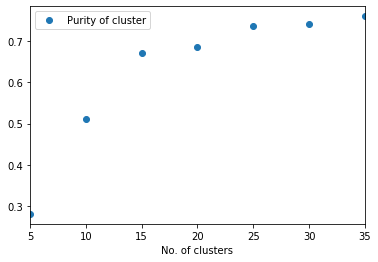

In [21]:
#plot purity of cluster against no of iterations
#graph flattens post 25 clusters, avoiding line plot as we didn't calculate purity for intermediate no of clusters
k_means_df.plot(x='No. of clusters', y='Purity of cluster', style='o')

<h3>Problem 8 – IRIS/MIXTURE-OF-GAUSSIANS</h3>

IRIS: Use any Mixture-of-Gaussians implementation (in R or scikit-learn) and build a Mixture-of-Gaussians density estimation on IRIS data

Ref : 
- https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html
- https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html
- https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

In [22]:
#read IRIS dataset again
iris = pd.read_csv('iris.csv')
iris_X = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
iris_y = iris.Species
print(iris.shape)
iris.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
#identify best gmm model based on BIC
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']

log_likelihood_dict = {}
log_likelihood_df = pd.DataFrame(columns = ['No. of Components', 'Score (Log Likelihood)'])

#Fit a Gaussian mixture with components from 1-7 and different cv_types to find best model
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(iris_X)
        
        #check log likelihood
        current_score = gmm.score(iris_X)
        if(current_score > log_likelihood_dict.get(n_components, -np.infty)) :
            log_likelihood_dict[n_components] = current_score
            
        bic.append(gmm.bic(iris_X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

best_gmm_model = best_gmm
print(best_gmm_model)

bic = np.array(bic)
bic

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)


array([1803.60427327, 1013.41183174,  854.9859925 ,  786.10880816,
        770.61099393,  734.21603661,  829.23492515,  688.31064896,
        633.76566548,  617.98571277,  665.17290709,  605.67682004,
       1520.76616481,  859.69508714,  746.77679977,  707.27951729,
        703.29275044,  699.06241227,  829.23492515,  575.64056274,
        582.48238737,  626.68206317,  675.29998556,  698.24704814])

<h4>Try different values of K (number of mixture components) and plot the likelihood value (y-axis) as a function of K (x-axis)</h4>

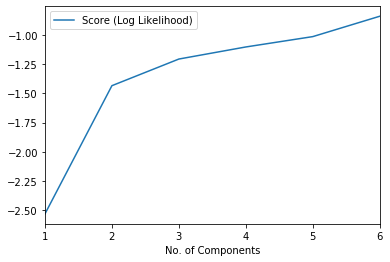

In [24]:
log_likelihood_df = pd.DataFrame(list(log_likelihood_dict.items()), columns=['No. of Components',
                                                                             'Score (Log Likelihood)'])
log_likelihood_df
log_likelihood_df.plot(x='No. of Components', y='Score (Log Likelihood)')

In [25]:
#check for predictions on model and verify
predict_Y = best_gmm_model.predict(iris_X)
predict_Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<h3>Problem 9 – MARKET-BASKET data</h3>

Ref - 
- https://pypi.org/project/mlxtend/
- https://datascience.stackexchange.com/questions/16769/best-frequent-itemset-package-in-python
- http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
- https://medium.com/edureka/apriori-algorithm-d7cc648d4f1e
- https://www.datacamp.com/community/tutorials/market-basket-analysis-r
- http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

Do frequent-itemset mining on the MARKET-BASKET data above. <br/>
Try different Support thresholds – 5, 10, 15, 20

In [26]:
#read datasets for market basket
aisles = pd.read_csv('market_basket/aisles.csv')
departments = pd.read_csv('market_basket/departments.csv')
order_products_train = pd.read_csv('market_basket/order_products__train.csv', usecols=['order_id','product_id'])
products = pd.read_csv('market_basket/products.csv')

#We proceed with only order_train dataset

In [27]:
#combine order and products to just understand products by name
order_products = pd.merge(
    pd.merge(
        pd.merge(order_products_train, products, on='product_id'), departments, on='department_id'),
    aisles, on='aisle_id')
order_products.sample()

,order_id,product_id,product_name,aisle_id,department_id,department,aisle
976029,2628021,7751,Tomato Ketchup,72,13,pantry,condiments


In [28]:
#Check top products to understand pattern
product_counts = order_products['product_name'].value_counts().rename_axis('product_name').reset_index(name='counts')
support_threshold = 5
products_greater_than_threshold = product_counts[product_counts['counts'] > support_threshold]
products_greater_than_threshold.head(10)

,product_name,counts
0,Banana,18726
1,Bag of Organic Bananas,15480
2,Organic Strawberries,10894
3,Organic Baby Spinach,9784
4,Large Lemon,8135
5,Organic Avocado,7409
6,Organic Hass Avocado,7293
7,Strawberries,6494
8,Limes,6033
9,Organic Raspberries,5546


**create pivot table with orders and products as list**

In [29]:
%%time
print(order_products.shape)
order_products = order_products.groupby('order_id')['product_name'].apply(list).reset_index(name='products')
print(order_products.shape)

(1384617, 7)
(131209, 2)
CPU times: user 12.1 s, sys: 48.7 ms, total: 12.1 s
Wall time: 12.1 s


**sample the data to work with only 8K rows in pivot order products df, this corresponds to 80K+ transactions**

In [30]:
order_products = order_products.sample(8000, random_state=42)
print(order_products.shape)

(8000, 2)


In [31]:
%%time
products_list = order_products.products

#encode the whole data into binary encoder to feed to apriori algo
encoder = TransactionEncoder()
products_array = encoder.fit(products_list).transform(products_list)
df = pd.DataFrame(products_array, columns=encoder.columns_)
df = df.astype(int)

#check sample data
df.sample(10)

CPU times: user 1.04 s, sys: 364 ms, total: 1.4 s
Wall time: 1.42 s


,#2 Coffee Filters,& Go! Hazelnut Spread + Pretzel Sticks,0% Fat Black Cherry Greek Yogurt y,0% Fat Blueberry Greek Yogurt,0% Fat Free Organic Milk,0% Fat Greek Yogurt Black Cherry on the Bottom,0% Fat Organic Greek Vanilla Yogurt,0% Fat Strawberry Greek Yogurt,0% Fat Superfruits Greek Yogurt,0% Fat Vanilla Greek Yogurt,...,from Concentrate Mango Nectar,gel hand wash sea minerals,go fresh Cool Moisture Beauty,of Hanover 100 Calorie Pretzels Mini,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate,w/Banana Pulp Free Juice,with Crispy Almonds Cereal,with Olive Oil Mayonnaise Dressing,with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum
6442,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5630,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As per apriori documentation - https://www.pydoc.io/pypi/mlxtend-0.7.0/autoapi/frequent_patterns/apriori/index.html

- min_support is defined by minimum support threshold we are working with/ total number of transactions

In [ ]:
%%time
support_thresholds = [5,10,15,20,25]
frequent_itemsets_df = pd.DataFrame(columns=['Support Threshold', 
                                             'Itemset size 2',
                                             'Itemset size 3',
                                             'Itemset size 4',
                                             'Itemset size 5'])

for support_threshold in support_thresholds :
    print("\nprocessing min support threshold : ", support_threshold)
    
    #remove all such products which are less than support threshold for itemset of size 1
    print(df.shape)
    df_temp = df.drop([col for col,
                       val in df.sum().iteritems() if val < support_threshold], axis=1)
    print(df_temp.shape)

    min_sup = support_threshold/df_temp.shape[1]
    frequent_itemsets = apriori(df_temp, min_support=min_sup, use_colnames=True)
    
    print(frequent_itemsets)
    #from frequent itemsets filter itemsets with size 2,3,4,5
    df_itemset_2 = frequent_itemsets[frequent_itemsets['itemsets'].map(len) == 2]
    print(df_itemset_2.shape)
    df_itemset_3 = frequent_itemsets[frequent_itemsets['itemsets'].map(len) == 3]
    print(df_itemset_3.shape)
    df_itemset_4 = frequent_itemsets[frequent_itemsets['itemsets'].map(len) == 4]
    print(df_itemset_4.shape)
    df_itemset_5 = frequent_itemsets[frequent_itemsets['itemsets'].map(len) == 5]
    print(df_itemset_5.shape)
    
    if not df_itemset_2.empty :
        print(df_itemset_2.sample(1))
    if not df_itemset_3.empty :
        print(df_itemset_3.sample(1))
    
    result = pd.DataFrame({'Support Threshold': support_threshold,
                           'Itemset size 2' : df_itemset_2.shape[0] if not df_itemset_2.empty else 0,
                           'Itemset size 3' : df_itemset_3.shape[0] if not df_itemset_3.empty else 0,
                           'Itemset size 4' : df_itemset_4.shape[0] if not df_itemset_4.empty else 0,
                           'Itemset size 5' : df_itemset_5.shape[0] if not df_itemset_5.empty else 0,
                          }, index=[support_threshold])
    frequent_itemsets_df = frequent_itemsets_df.append(result)


processing min support threshold :  5
(8000, 15617)
(8000, 3448)


- For each, count the number of frequent item-sets of size 2,3,4,5 you get. 
- Create a table with support threshold on x-axis and item-set size on y-axis
- Put in each cell the number of frequent-itemsets you find.
- Comment on how these numbers are changing as you go along the two dimensions

In [ ]:
#check some sample sets for each itemset size
frequent_itemsets_df.head()

In [ ]:
frequent_itemsets_df.plot(x="Support Threshold", 
                          y=['Itemset size 2','Itemset size 3','Itemset size 4','Itemset size 5'],
                          kind="line", xticks=frequent_itemsets_df.index, figsize=(14,8))
plt.show()

<h3> Problem 10 – Map-Reduce for Mixture-of-Gaussians </h3>

Ref : 
- https://www.coursera.org/lecture/ml-clustering-and-retrieval/mapreduce-for-k-means-EhCYk
- http://lintool.github.io/UMD-courses/bigdata-2013-Spring/slides/session07.pdf
- https://prism.ucalgary.ca/bitstream/handle/11023/3053/ucalgary_2016_esmaeilpour_arina.pdf?sequence=3